In [1]:
#the customary libraries
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

- Generate data from a "mixture model"
- Implement the K-means clustering algorithm and apply it to your data
- Some potential points to evaluate: How similar are the clusters to the "true" mixture? Does this depend on the amount of data? How does the model change with the number of mixture components (keeping the number fixed in the generating model)? How well can you visualize your data and algorithm?

K-means --> minimize the sum squared difference between data points and $\mu_k$ centers.

Algorithm steps:
1. guess the initial $\mu_k$ centers
2. determine which cluster to assign to each data point
3. Calculate the $r_{n,k}$
4. Using the above r, find $\mu_k$ that minimize(s) the function J --> the mean, $\frac{\Sigma _n (r_{nk}x_n)}{\Sigma_n r_{nk}}$
5. Fix $\mu_k$, find r values
6. Fix r, find $\mu_k$ values
7. USW. Repeat until some convergence criterion is satisfied

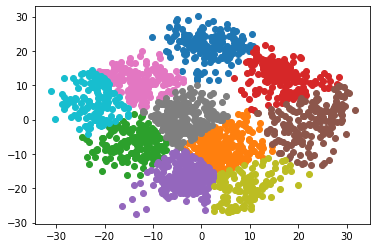

In [4]:
#the following is copied verbatim from https://www.askpython.com/python/examples/plot-k-means-clusters-python,
#with the intention simply of generating "patchy" data --> the "true" mixture

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Load Data
data = load_digits().data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1])

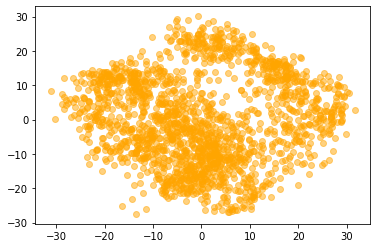

In [50]:
#now, removing the colors:
for point in df:
    plt.scatter(point[0] , point[1] , color='orange',alpha=0.5)

In [58]:
#the aim now is to perform k-means clustering to find centers assuming k = 2,4 for each iteration.

## K=2

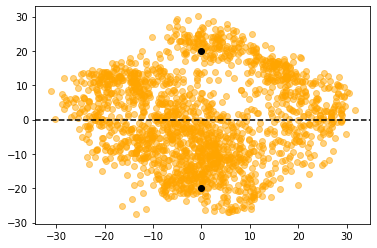

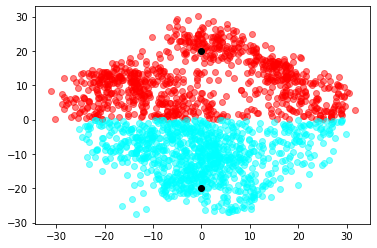

In [96]:
plt.figure()
for point in df:
    plt.scatter(point[0] , point[1] , color='orange',alpha=0.5)

mu_init = np.array([(0,-20),(0,20)])
plt.scatter(mu_init[0][0],mu_init[0][1],color='black')
plt.scatter(mu_init[1][0],mu_init[1][1],color='black')   
plt.axhline(0,linestyle='--',color='black')

#points above dashed line will "belong" to the first cluster. Those below, the second cluster.
#the true,false arrays effectively constitute the r values
cluster_one_flag=[]
for point in df:
    if point[1]>0:
        cluster_one_flag.append(True)
    else:
        cluster_one_flag.append(False)
df_one = df[cluster_one_flag]
        

cluster_two_flag=[]
for point in df:
    if point[1]<0:
        cluster_two_flag.append(True)
    else:
        cluster_two_flag.append(False)
df_two = df[cluster_two_flag]
        
        
#plotting overlay 
plt.figure()
for point in df_one:
    plt.scatter(point[0] , point[1] , color='red',alpha=0.5)

for point in df_two:
    plt.scatter(point[0],point[1],color='cyan',alpha=0.5)

plt.scatter(mu_init[0][0],mu_init[0][1],color='black')
plt.scatter(mu_init[1][0],mu_init[1][1],color='black')    

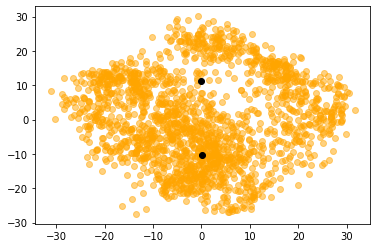

In [56]:
#find 𝜇𝑘 that minimize(s) the function J --> the mean



#generating average x,y for new mu_k estimates

#cluster one
x_one = 0
y_one = 0
for point in df_one:
    x_one += point[0]
    y_one += point[1]
mu_newone = (x_one/len(df_one),y_one/len(df_one))

#cluster two
x_two = 0
y_two = 0
for point in df_two:
    x_two += point[0]
    y_two += point[1]
mu_newtwo = (x_two/len(df_two),y_two/len(df_two))




#rinse and repeat!
plt.figure()
for point in df:
    plt.scatter(point[0] , point[1] , color='orange',alpha=0.5)

mu_new = np.array([mu_newone,mu_newtwo])
plt.scatter(mu_new[0][0],mu_new[0][1],color='black')
plt.scatter(mu_new[1][0],mu_new[1][1],color='black') 

In [59]:
#simply from inspection, it is looking like these two points are going to settle such that the upper half
#will remain cluster one members, while the bottom half will continue representing cluster two.
#as such, I will terminate the process here. 

## K = 4

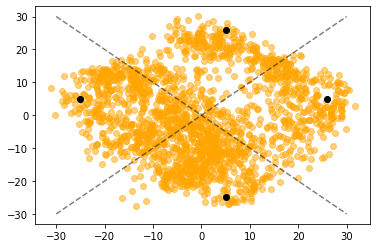

In [65]:
plt.figure()
for point in df:
    plt.scatter(point[0] , point[1] , color='orange',alpha=0.5)

mu_init = np.array([(5,-25),(5,26),(-25,5),(26,5)])
plt.scatter(mu_init[0][0],mu_init[0][1],color='black')
plt.scatter(mu_init[1][0],mu_init[1][1],color='black')
plt.scatter(mu_init[2][0],mu_init[2][1],color='black')
plt.scatter(mu_init[3][0],mu_init[3][1],color='black')

line_dat = np.linspace(-30,30,1797)
#for the "division" lines, I will approximate slopes to simply be either 1 or -1
plt.plot(line_dat,line_dat*1,linestyle='--',color='black',alpha=0.5)
plt.plot(line_dat,line_dat*-1,linestyle='--',color='black',alpha=0.5)

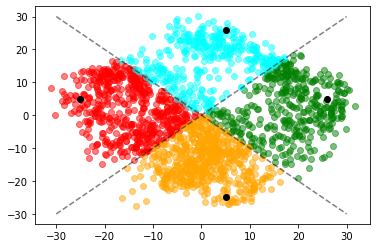

In [93]:
#incidentally, coding this section was not a pleasurable experience.


#assigning the 'r' values...


cluster_one_flag=[]
for point in df:
    # if point is above y=x line and below y=-x line, which is to say that y_point > x_point and 
    # y_point<x_point, respectively (and, of course, within the x interval -40 to 0)
    if (point[0]>-40) & (point[0]<0) & (point[1]<=-point[0]) & (point[1]>=point[0]):
        cluster_one_flag.append(True)
    else:
        cluster_one_flag.append(False)
df_one = df[cluster_one_flag]


cluster_two_flag=[]
for point in df:
    if (point[0]<40) & (point[0]>0) & (point[1]>=-point[0]) & (point[1]<=point[0]):
        cluster_two_flag.append(True)
    else:
        cluster_two_flag.append(False)
df_two = df[cluster_two_flag]


cluster_three_flag=[]
for point in df:   
    if (point[1]>0) & (point[1]<40) & (point[0]>=-point[1]) & (point[0]<=point[1]):
        cluster_three_flag.append(True)
    else:
        cluster_three_flag.append(False)
df_three = df[cluster_three_flag]


cluster_four_flag=[]
for point in df:
    if (point[1]>-40) & (point[1]<0) & (point[0]>=point[1]) & (point[0]<=-point[1]):
        cluster_four_flag.append(True)
    else:
        cluster_four_flag.append(False)
df_four = df[cluster_four_flag]


for point in df_one:
    plt.scatter(point[0] , point[1] , color='red',alpha=0.5)
for point in df_two:
    plt.scatter(point[0] , point[1] , color='green',alpha=0.5)
for point in df_three:
    plt.scatter(point[0] , point[1] , color='cyan',alpha=0.5)
for point in df_four:
    plt.scatter(point[0] , point[1] , color='orange',alpha=0.5)

plt.plot(line_dat,line_dat*1,linestyle='--',color='black',alpha=0.5)
plt.plot(line_dat,line_dat*-1,linestyle='--',color='black',alpha=0.5)

plt.scatter(mu_init[0][0],mu_init[0][1],color='black')
plt.scatter(mu_init[1][0],mu_init[1][1],color='black')
plt.scatter(mu_init[2][0],mu_init[2][1],color='black')
plt.scatter(mu_init[3][0],mu_init[3][1],color='black')

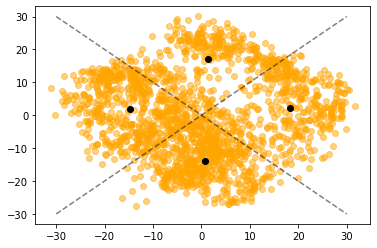

In [95]:
#find 𝜇𝑘 that minimize(s) the function J --> the mean



#generating average x,y for new mu_k estimates

#cluster one
x_one = 0
y_one = 0
for point in df_one:
    x_one += point[0]
    y_one += point[1]
mu_newone = (x_one/len(df_one),y_one/len(df_one))

#cluster two
x_two = 0
y_two = 0
for point in df_two:
    x_two += point[0]
    y_two += point[1]
mu_newtwo = (x_two/len(df_two),y_two/len(df_two))

#cluster three
x_three = 0
y_three = 0
for point in df_three:
    x_three += point[0]
    y_three += point[1]
mu_newthree = (x_three/len(df_three),y_three/len(df_three))

#cluster four
x_four = 0
y_four = 0
for point in df_four:
    x_four += point[0]
    y_four += point[1]
mu_newfour = (x_four/len(df_four),y_four/len(df_four))



#rinse and repeat!
plt.figure()
for point in df:
    plt.scatter(point[0] , point[1] , color='orange',alpha=0.5)

mu_new = np.array([mu_newone,mu_newtwo,mu_newthree,mu_newfour])
plt.scatter(mu_new[0][0],mu_new[0][1],color='black')
plt.scatter(mu_new[1][0],mu_new[1][1],color='black') 
plt.scatter(mu_new[2][0],mu_new[2][1],color='black')
plt.scatter(mu_new[3][0],mu_new[3][1],color='black')
plt.plot(line_dat,line_dat*1,linestyle='--',color='black',alpha=0.5)
plt.plot(line_dat,line_dat*-1,linestyle='--',color='black',alpha=0.5)

In [97]:
#again, one iteration appears necessary to really position the centers into "correct" spots. 

#If not for the lengthy process, I would be eager to have a go at 10 centers to determine whether the
#algorithm is able to settle on those preestablished patches displayed in the first cell or so.
#While this could simply be attributable to how I defined the boundaries (hooray for bias), or the symmetric
#nature of the dataset, but the centers did settle in qualitatively suitable spots only following 
#one iteration each of the algorithm. 